#### This doc was used to test functions

Requirements
1. Code is bug-free.

2. Mean reward above 475 on the last 100 episodes

3. Graph mean reward over episodes

Requirement 2 tracking, add ep_rew_mean to 475

ep_rew_mean: Mean episodic training reward (averaged over 100 episodes), a Monitor wrapper is required to compute that value (automatically added by make_vec_env).

Vectorized Environments

collect_rollouts(env, callback, rollout_buffer, n_rollout_steps)

In [29]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3 import DQN 
import os
import gym
from stable_baselines3 import PPO 
from stable_baselines3.common.vec_env import DummyVecEnv  
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import A2C
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback
import numpy as np
import pandas as pd


Creating Environment, multiple vectorized training environments

In [32]:
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env_name = "CartPole-v1"
seed = 5
log_path = os.path.join("Logs","logs")
tmp_path = os.path.join("Logs","tmp")
env = gym.make(env_name)
env = Monitor(env, log_dir)
env = DummyVecEnv([lambda: env])# wrapped env in a dummy vec env wrapper
#env creation function



model = PPO('MlpPolicy',env,verbose = 1)
new_logger = configure(tmp_path, ["stdout", "csv"])
model.set_logger(new_logger)
#model.collect_rollouts(env,)


Using cpu device
Logging to Logs\tmp


### Training till 475, to test callback

In [33]:
save_path = os.path.join("Logs","Models")
stop_callback = StopTrainingOnRewardThreshold(reward_threshold = 475 , verbose = 1)

eval_callback =EvalCallback(env,
 callback_on_new_best = stop_callback, #callback we want to run on the new best model 
 eval_freq=1000, #how frequently running eval_callback
 best_model_save_path=save_path,
 verbose =1)

In [34]:
model.learn(total_timesteps=20000,callback = eval_callback)

Eval num_timesteps=1000, episode_reward=136.20 +/- 20.09
Episode length: 136.20 +/- 20.09
---------------------------------
| eval/              |          |
|    mean_ep_length  | 136      |
|    mean_reward     | 136      |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=140.80 +/- 23.57
Episode length: 140.80 +/- 23.57
---------------------------------
| eval/              |          |
|    mean_ep_length  | 141      |
|    mean_reward     | 141      |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | 21.5     |
| time/              |          |
|    fps             | 2069     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048 

In [38]:
def evaluate_model(ep_num): 
    episodes = ep_num
    score_mean = []
    for episode in range(1,episodes+1):
        obs = env.reset() #resetting observation instead
        done = False
        score = 0

        while not done:
            env.render()
            action,_ = model.predict(obs)  #model predicting based on observation
            obs, reward,done,info = env.step(action)  #making action based on models choice
            score += reward
        print('Episode:{} Score:{}'.format(episode,score))
        score_mean.append(score[0])
    print(np.mean(score_mean))
    env.close()
    

In [36]:
df = pd.read_csv(os.path.join(tmp_path,'progress.csv'))
df.head()

,eval/mean_ep_length,time/total_timesteps,eval/mean_reward,rollout/ep_rew_mean,time/time_elapsed,rollout/ep_len_mean,time/iterations,time/fps,train/loss,train/explained_variance,train/learning_rate,train/n_updates,train/clip_fraction,train/policy_gradient_loss,train/approx_kl,train/clip_range,train/entropy_loss,train/value_loss
0,136.2,1000,136.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,140.8,2000,140.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2048,NaN,21.463158,0.0,21.463158,1.0,2069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,305.8,3000,305.8,NaN,NaN,NaN,NaN,NaN,5.112752,-0.001127,0.0003,10.0,0.0979,-0.015247,0.008261,0.2,-0.68611,48.756567
4,261.4,4000,261.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time/total_timesteps'>

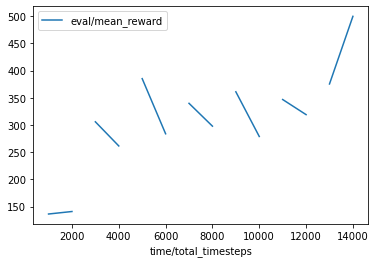

In [37]:
df.plot('time/total_timesteps','eval/mean_reward')

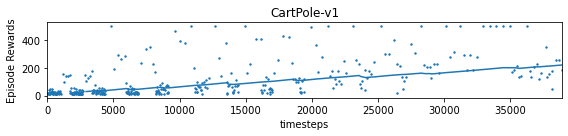

In [39]:
from stable_baselines3.common import results_plotter
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "CartPole-v1")

References

https://colab.research.google.com/github/Stable-Baselines-Team/rl-colab-notebooks/blob/sb3/monitor_training.ipynb#scrollTo=PQmsSZUHKNRG
